In [16]:
using Analytical,CSV, DataFrames, RCall;
R"""library(data.table);library(ggplot2);library(dplyr)"""
include("/home/jmurga/mkt/202004/scripts/src/summaryParser.jl");
RCall.rcall_p(:options, rcalljl_options=Dict(:width => 1000, :height => 800))

Ptr{VecSxp} @0x000000001258d550

In [17]:
PATH = "/home/jmurga/mkt/202004/results/simulations/"

"/home/jmurga/mkt/202004/results/simulations/"

# Ne and sample size

In [ ]:
ne = [100,500,1000,5000,10000,50000,100000,500000]

## B = 0.2

In [ ]:
df1, sm1 = discussNe(alpha=0.4,alphaLow=0.2,bgs=0.2,pSize=ne,nSize=100,l=2*10^5)

In [ ]:
df2, sm2 = discussNe(alpha=0.4,alphaLow=0.2,bgs=0.2,pSize=ne[2:end],nSize=500,l=2*10^5)

## B = 0.999

In [ ]:
df3, sm3 = discussNe(alpha=0.4,alphaLow=0.2,bgs=0.999,pSize=ne,nSize=100,l=2*10^5)

In [ ]:
df4, sm4 = discussNe(alpha=0.4,alphaLow=0.2,bgs=0.999,pSize=ne[2:end],nSize=500,l=2*10^5)

## Plotting results

In [ ]:
R"""

    df = rbind($sm1,$sm2,$sm3,$sm4) %>% as.data.table
    fwrite(df,paste0($PATH,'/neAlphas.tsv'),sep='\t')

    df = melt.data.table(df,id.vars=c("f","Ne","B","Sample"))
    d1 = df[Sample==100]
    d2 = df[Sample==500 & Ne!=100]


    p1 = ggplot(d1) + geom_line(aes(x=f,y=value,color=variable)) + facet_grid(vars(Ne),vars(B)) + ylim(-0.6,0.5) + theme_bw() + scale_color_manual(values=c('black','#ab2710')) + labs(title="Sample = 100") + theme(plot.title = element_text(color = 'black', size = 16, face = "bold"))

    p2 = ggplot(d2) + geom_line(aes(x=f,y=value,color=variable)) + facet_grid(vars(Ne),vars(B)) + ylim(-0.6,0.5) + theme_bw() + scale_color_manual(values=c('black','#ab2710')) + labs(title="Sample = 500") + theme(plot.title = element_text(color = 'black', size = 16, face = "bold"))


    library("cowplot")

    prow <- plot_grid(
        p1 + theme(legend.position="none"),
        p2 + theme(legend.position="none"),
        align = 'vh',
        labels = c("A", "B"),
        hjust = -1,
        nrow = 1
    )

    legend_b <- get_legend(
    p1 +
        guides(color = guide_legend(nrow = 1)) +
        theme(legend.position = "bottom")
    )

    p = plot_grid(prow, legend_b, ncol = 1, rel_heights = c(1, .1))
    ggsave(p,file=paste0($PATH,'/ne.svg'))
    ggsave(p,file=paste0($PATH,'/ne.jpg'),dpi=600)


    df = rbind($df1,$df2,$df3,$df4) %>% as.data.table
    fwrite(df,paste0($PATH,'/neComparison.tsv'),sep='\t')

"""

# Modeled $\alpha_{(x)}$

## noDemog

In [3]:
dac=[1,2,4,5,10,20,50,200,500,700];

In [ ]:
df1 = readSimulations(analysis="noDemog_0.4_0.1_0.2",N=5000,n=500,path="/home/jmurga/mkt/202004/rawData/simulations/noDemog/")
plotModel(df1,dac)

In [ ]:
df2 = readSimulations(analysis="noDemog_0.4_0.3_0.2",N=5000,n=661,dac=[1,2,4,5,10,20,50,200,500,700],path="/home/jmurga/mkt/202004/rawData/simulations/noDemog/")

In [ ]:
df3 = readSimulations(analysis="noDemog_0.4_0.1_0.999",N=5000,n=500,dac=[1,2,4,5,10,20,50,200,500,1000],path="/home/jmurga/mkt/202004/rawData/simulations/noDemog/")

In [ ]:
df4 = readSimulations(analysis="noDemog_0.4_0.3_0.999",N=5000,n=661,dac=[1,2,4,5,10,20,50,200,500,1000],path="/home/jmurga/mkt/202004/rawData/simulations/noDemog/")

In [ ]:
tmp = vcat(df1,df2,df3,df4)

In [ ]:
R"""
    df = as.data.table($tmp)
    tmp1 = df[(analysis == 'noDemog_0.4_0.1_0.2' | analysis == 'noDemog_0.4_0.3_0.2') & B==0.15]
    tmp2 = df[(analysis == 'noDemog_0.4_0.1_0.999' | analysis == 'noDemog_0.4_0.3_0.999') & B==0.85]
    df = rbind(tmp1,tmp2)
    
    df = df[f %in% $dac]
    df$f = as.factor(df$f)
    df$f2 = rep(seq(1,length($dac)),length(unique(df$B))*2)
    
    df$analysis = factor(df$analysis,levels=c('noDemog_0.4_0.1_0.2','noDemog_0.4_0.3_0.2','noDemog_0.4_0.1_0.999','noDemog_0.4_0.3_0.999'))

    df$alphaW = factor(df$alphaW, labels = c('alpha[w]:0.1','alpha[w]:0.3'))
    df$B = factor(df$B, labels = c('B:0.2','B:0.999'))

    #p = ggplot(df) + geom_errorbar(data=df,aes(x=f, ymin=lower, ymax=upper),color="gray", width=0.1) + geom_line(aes(x=f,y=value,colour='Input alpha(x)'),size=0.5) 
    p = ggplot(df) + geom_errorbar(data=df,aes(x=f, ymin=lower, ymax=upper),color="gray", width=0.1) + geom_line(aes(x=f2,y=value,colour='Input alpha(x)'),size=0.5) 

    p = p + scale_color_manual(values='#ab2710') + facet_grid(~analysis) + theme_bw() + facet_grid(B~alphaW,labeller=label_parsed) + ylim(-0.8,0.5) +   labs(color = '') + theme(legend.position="bottom",legend.text=element_text(size=14),plot.title=element_text(hjust=0.5,face='bold'))

#ggsave(p,filename="/home/jmurga/mkt/202004/results/simulations/model/tennesen/model_tennesen.svg");p
"""

In [ ]:
R"""
    prop = df %>% mutate(prop = value >= lower & value <= upper) %>% group_by(analysis) %>% summarize(ci = table(prop)['TRUE']/sum(table(prop)));prop
    
    fwrite(prop,'/home/jmurga/mkt/202004/results/simulations/model/noDemogModelInCiReduced.tsv',sep='\t')

    ggsave(p,filename='/home/jmurga/mkt/202004/results/simulations/model/noDemogModeledAlphaReduced.jpg',dpi=600)
    ggsave(p,filename='/home/jmurga/mkt/202004/results/simulations/model/noDemogModeledAlphaReduced.svg')
"""

## Tennesen

In [18]:
dac=[1,2,4,5,10,20,50,200,500,1000];

In [19]:
df1 = readSimulations(analysis="tennesen_0.4_0.1_0.8",N=5000,n=661,path="/home/jmurga/mkt/202004/rawData/simulations/tennesen/");

┌ Warning: RCall.jl: Saving 7 x 7 in image
└ @ RCall /home/jmurga/.julia/packages/RCall/AEOQ7/src/io.jl:160


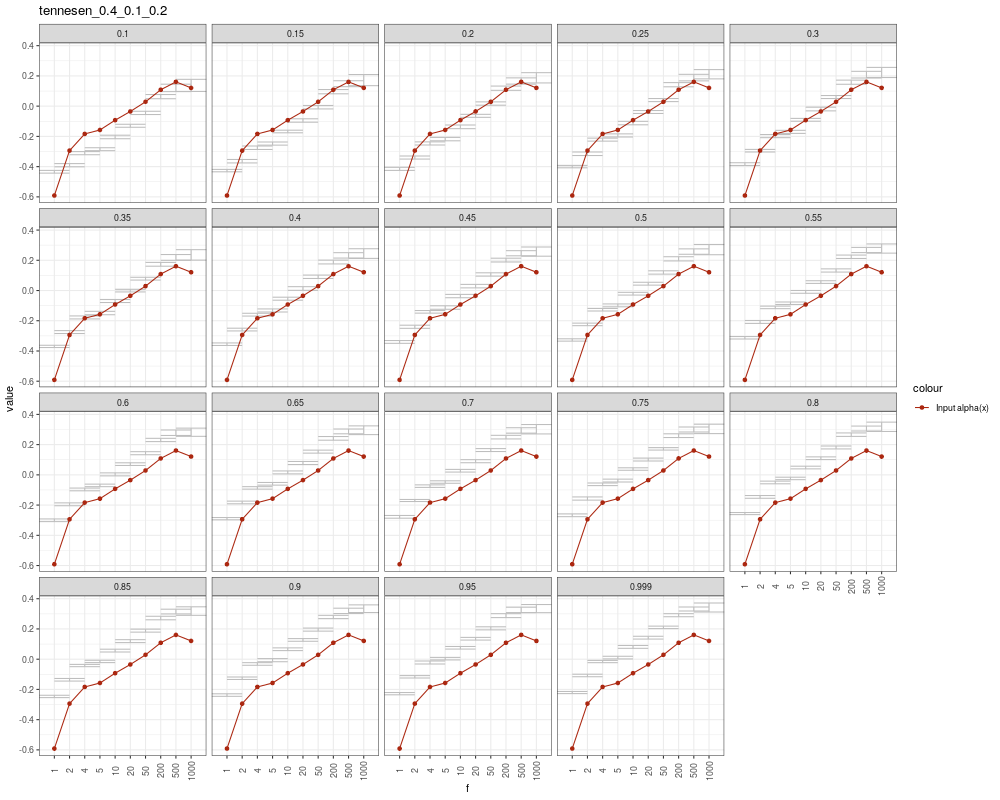

RObject{VecSxp}


In [20]:
plotModel(df=df1,dac=dac,title="tennesen_0.4_0.1_0.8",gridColumns=5,output="/home/jmurga/mkt/202004/results/simulations/model/tennesen/model_tennesen_0.4_0.1_0.8.jpg")

In [21]:
df2 = readSimulations(analysis="tennesen_0.4_0.3_0.8",N=5000,n=661,path="/home/jmurga/mkt/202004/rawData/simulations/tennesen/");

,f,lower,upper,mean,Estimation_x,Estimation_y,variable
,Int64,Float64,Float64,Float64,String,String,Cat…
1,1,-0.582153,-0.560803,-0.572378,Analytical,Input alpha(x),input
2,2,-0.535771,-0.511827,-0.523751,Analytical,Input alpha(x),input
3,3,-0.490387,-0.463454,-0.476921,Analytical,Input alpha(x),input
4,4,-0.450871,-0.427367,-0.439261,Analytical,Input alpha(x),input
5,5,-0.424194,-0.398172,-0.40993,Analytical,Input alpha(x),input
6,6,-0.401616,-0.376205,-0.387308,Analytical,Input alpha(x),input
7,7,-0.379606,-0.356868,-0.369036,Analytical,Input alpha(x),input
8,8,-0.365504,-0.340132,-0.351795,Analytical,Input alpha(x),input
9,9,-0.352757,-0.323817,-0.337349,Analytical,Input alpha(x),input


┌ Warning: RCall.jl: Saving 7 x 7 in image
└ @ RCall /home/jmurga/.julia/packages/RCall/AEOQ7/src/io.jl:160


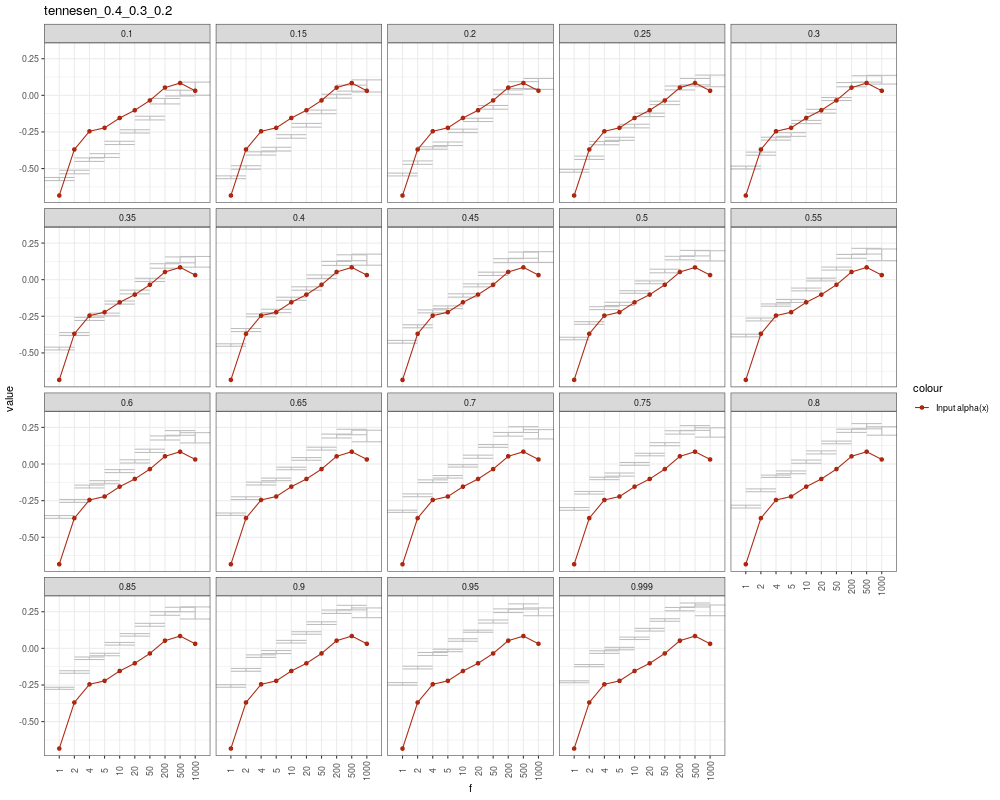

RObject{VecSxp}


In [22]:
plotModel(df=df2,dac=dac,title="tennesen_0.4_0.3_0.8",gridColumns=5,output="/home/jmurga/mkt/202004/results/simulations/model/tennesen/model_tennesen_0.4_0.3_0.8.svg")
plotModel(df=df2,dac=dac,title="tennesen_0.4_0.3_0.8",gridColumns=5,output="/home/jmurga/mkt/202004/results/simulations/model/tennesen/model_tennesen_0.4_0.3_0.8.jpg")

In [23]:
df3 = readSimulations(analysis="tennesen_0.4_0.1_0.999",N=5000,n=661,path="/home/jmurga/mkt/202004/rawData/simulations/tennesen/");

,f,lower,upper,mean,Estimation_x,Estimation_y,variable
,Int64,Float64,Float64,Float64,String,String,Cat…
1,1,-0.441692,-0.425737,-0.433813,Analytical,Input alpha(x),input
2,2,-0.39896,-0.378986,-0.388859,Analytical,Input alpha(x),input
3,3,-0.356243,-0.33662,-0.345853,Analytical,Input alpha(x),input
4,4,-0.319722,-0.300178,-0.309924,Analytical,Input alpha(x),input
5,5,-0.29193,-0.274355,-0.28306,Analytical,Input alpha(x),input
6,6,-0.270572,-0.252307,-0.2619,Analytical,Input alpha(x),input
7,7,-0.253464,-0.234508,-0.243295,Analytical,Input alpha(x),input
8,8,-0.238472,-0.218043,-0.228272,Analytical,Input alpha(x),input
9,9,-0.222571,-0.205453,-0.214974,Analytical,Input alpha(x),input


┌ Warning: RCall.jl: Saving 7 x 7 in image
└ @ RCall /home/jmurga/.julia/packages/RCall/AEOQ7/src/io.jl:160


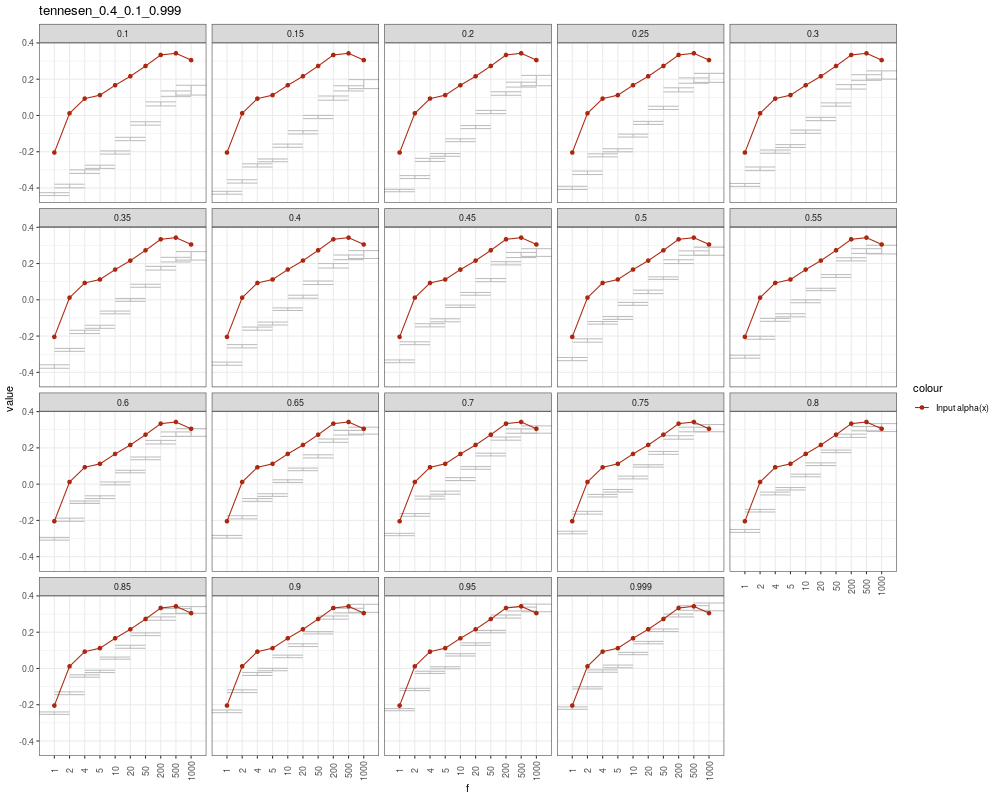

RObject{VecSxp}


In [24]:
plotModel(df=df3,dac=dac,title="tennesen_0.4_0.1_0.999",gridColumns=5,output="/home/jmurga/mkt/202004/results/simulations/model/tennesen/model_tennesen_0.4_0.1_0.999.svg")
plotModel(df=df3,dac=dac,title="tennesen_0.4_0.1_0.999",gridColumns=5,output="/home/jmurga/mkt/202004/results/simulations/model/tennesen/model_tennesen_0.4_0.1_0.999.jpg")

In [25]:
df4 = readSimulations(analysis="tennesen_0.4_0.3_0.999",N=5000,n=661,path="/home/jmurga/mkt/202004/rawData/simulations/tennesen/");

,f,lower,upper,mean,Estimation_x,Estimation_y,variable
,Int64,Float64,Float64,Float64,String,String,Cat…
1,1,-0.57965,-0.563106,-0.572289,Analytical,Input alpha(x),input
2,2,-0.534797,-0.516083,-0.524806,Analytical,Input alpha(x),input
3,3,-0.489301,-0.469935,-0.478334,Analytical,Input alpha(x),input
4,4,-0.447438,-0.431308,-0.440048,Analytical,Input alpha(x),input
5,5,-0.419994,-0.402815,-0.41188,Analytical,Input alpha(x),input
6,6,-0.39678,-0.378572,-0.387639,Analytical,Input alpha(x),input
7,7,-0.377434,-0.360414,-0.368743,Analytical,Input alpha(x),input
8,8,-0.362019,-0.342095,-0.352496,Analytical,Input alpha(x),input
9,9,-0.347409,-0.329316,-0.337931,Analytical,Input alpha(x),input


┌ Warning: RCall.jl: Saving 7 x 7 in image
└ @ RCall /home/jmurga/.julia/packages/RCall/AEOQ7/src/io.jl:160


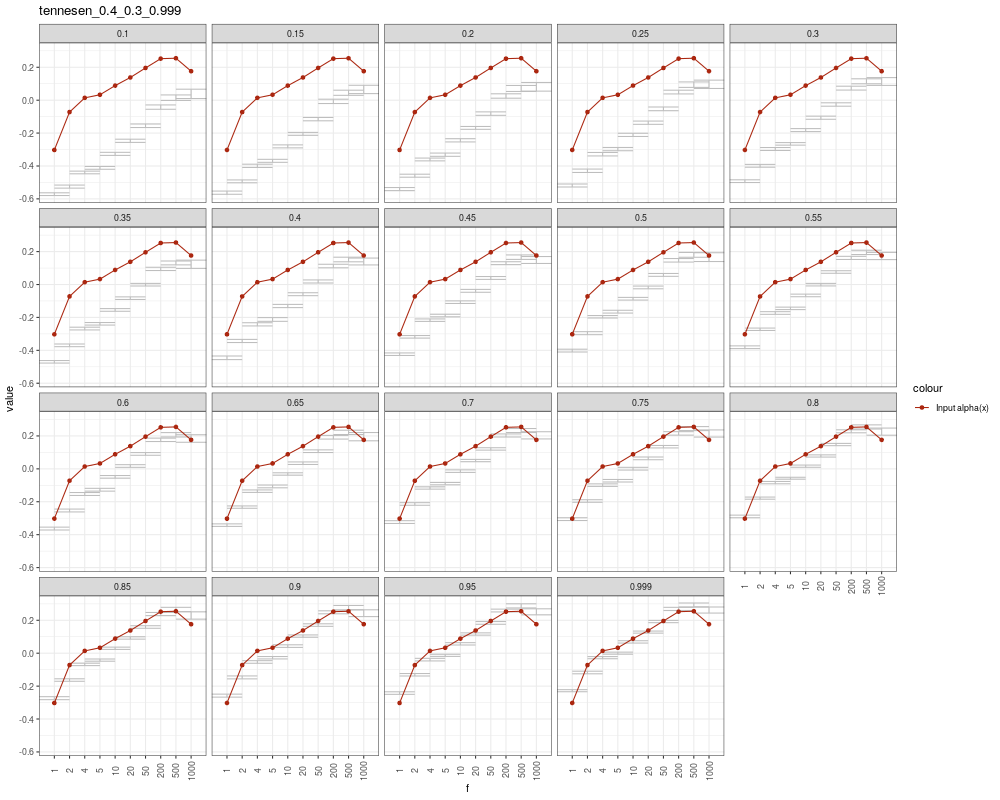

RObject{VecSxp}


In [28]:
plotModel(df=df4,dac=dac,title="tennesen_0.4_0.3_0.999",gridColumns=5,output="/home/jmurga/mkt/202004/results/simulations/model/tennesen/model_tennesen_0.4_0.3_0.999.svg")
plotModel(df=df4,dac=dac,title="tennesen_0.4_0.3_0.999",gridColumns=5,output="/home/jmurga/mkt/202004/results/simulations/model/tennesen/model_tennesen_0.4_0.3_0.999.jpg")

In [29]:
tmp = vcat(df1,df2,df3,df4);

┌ Warning: RCall.jl: Saving 7 x 7 in image
└ @ RCall /home/jmurga/.julia/packages/RCall/AEOQ7/src/io.jl:160


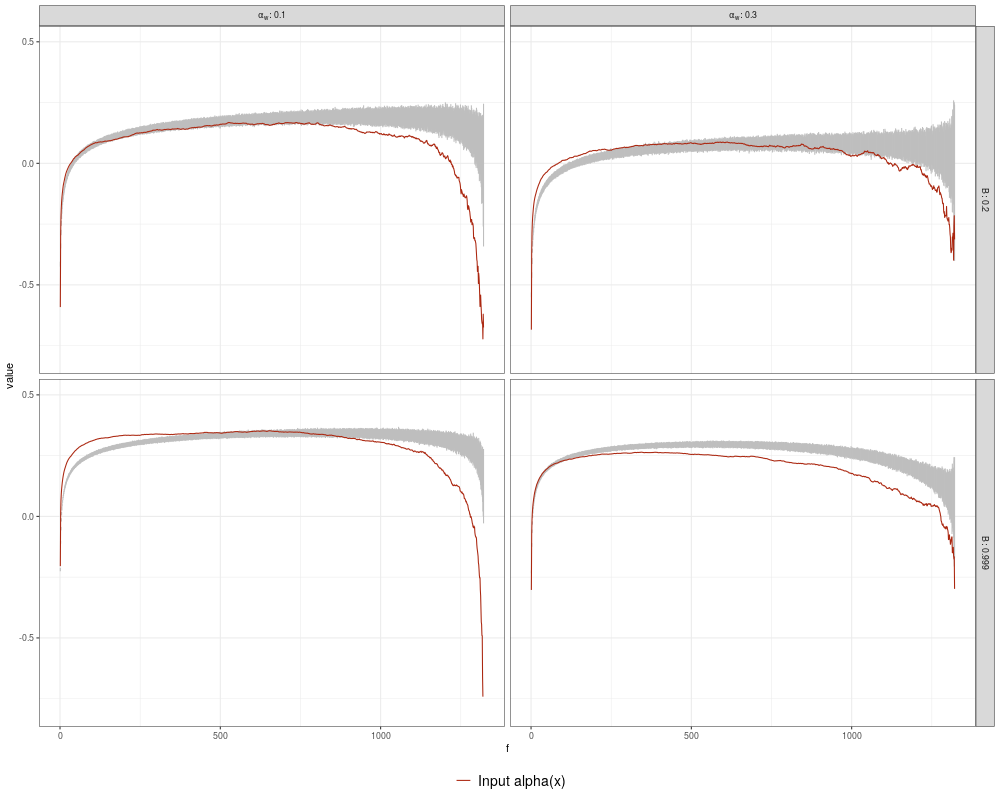

RObject{VecSxp}


In [43]:
R"""
    df = as.data.table($tmp)
    tmp1 = df[(analysis == 'tennesen_0.4_0.1_0.8' | analysis == 'tennesen_0.4_0.3_0.8') & B==0.7];tmp1$B=0.8
    tmp2 = df[(analysis == 'tennesen_0.4_0.1_0.999' ) & B==0.2];tmp2$B=0.999
    tmp3 = df[(analysis == 'tennesen_0.4_0.3_0.999') & B==0.9];tmp3$B=0.999

    df = rbind(tmp1,tmp3,tmp2)
    
    #df = df[f %in% $dac]
    #df$f = as.factor(df$f)
    #df$f2 = rep(seq(1,length($dac)),length(unique(df$B))*2)
    
    df$analysis = factor(df$analysis,levels=c('tennesen_0.4_0.1_0.8','tennesen_0.4_0.3_0.8','tennesen_0.4_0.1_0.999','tennesen_0.4_0.3_0.999'))

    df$alphaW = factor(df$alphaW, labels = c('alpha[w]:0.1','alpha[w]:0.3'))
    df$B = factor(df$B, labels = c('B:0.8','B:0.999'))

    p = ggplot(df) + geom_errorbar(data=df,aes(x=f, ymin=lower, ymax=upper),color="gray", width=0.1) + geom_line(aes(x=f,y=value,colour='Input alpha(x)'),size=0.5) 
    #p = ggplot(df) + geom_errorbar(data=df,aes(x=f, ymin=lower, ymax=upper),color="gray", width=0.1) + geom_line(aes(x=f2,y=value,colour='Input alpha(x)'),size=0.5) 

    p = p + scale_color_manual(values='#ab2710') + facet_grid(~analysis) + theme_bw() + facet_grid(B~alphaW,labeller=label_parsed) + ylim(-0.8,0.5) +   labs(color = '') + theme(legend.position="bottom",legend.text=element_text(size=14),plot.title=element_text(hjust=0.5,face='bold'))


ggsave(p,filename="/home/jmurga/mkt/202004/results/simulations/model/tennesen/model_tennesen.svg");
ggsave(p,filename="/home/jmurga/mkt/202004/results/simulations/model/tennesen/model_tennesen.jpg",dpi=300);p

"""